<a href="https://colab.research.google.com/github/ankitrahejagatech/7641HW1/blob/main/notebooks/ExplorationOfDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:

%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Example estimator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
bank_marketing = fetch_ucirepo(id=222)
from sklearn.preprocessing import OneHotEncoder
#bank_marketing = pd.read_csv('/Users/ankitraheja/PycharmProjects/CS7641HW1/data/bank-additional.csv', sep=';')
#bankmarketing_df = pd.DataFrame(bank_marketing)
#bankmarketing_df.to_csv('bankmarketing.csv', index=False)
#DataEncoding

#MissingDataStrategy

X1 = pd.DataFrame(bank_marketing.data.features, columns=bank_marketing.feature_names)


y1 = pd.DataFrame(bank_marketing.data.targets)

y1['y'] = y1['y'].replace({'yes': 1, 'no': 0})

Note: you may need to restart the kernel to use updated packages.


In [33]:
X1.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [34]:
# print(X1['age'].unique())
# print(X1['job'].unique()) #modify
# one_hot = pd.get_dummies(X1['job'], prefix='job')
# X1 = X1.drop('job', axis=1)
# X1 = pd.concat([X1, one_hot], axis=1)
# print(X1['marital'].unique()) #modify
# one_hot = pd.get_dummies(X1['marital'], prefix='marital')
# # Drop the original 'Color' column from 'df'
# X1 = X1.drop('marital', axis=1)
# X1 = pd.concat([X1, one_hot], axis=1)
# #X1['marital_encoded'] = encoder.fit_transform(X1['marital'])
# print(X1['education'].unique()) #modify ordinal
X1['education'] = X1['education'].replace({'primary': 0, 'secondary':1,'tertiary':2})
# print(X1['default'].unique())  #modify
X1['default'] = X1['default'].replace({'yes': 1, 'no':0})
# print(X1['balance'].unique())
# print(X1['housing'].unique())  #modify
X1['housing'] = X1['housing'].replace({'yes': 1, 'no':0})
# #print(X1['loan'].unique())  #modify
X1['loan'] = X1['loan'].replace({'yes': 1, 'no':0})
# print(X1['contact'].unique())  #modify
#
# print(X1['day_of_week'].unique())
# #print(X1['month'].unique())  #modify
X1['month'] = X1['month'].replace({'may':5 ,'jun':6, 'jul' :7, 'aug' :8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3, 'apr':4, 'sep':9})
# print(X1['duration'].unique())
# print(X1['campaign'].unique())
# print(X1['pdays'].unique())
# print(X1['previous'].unique())
# #print(X1['poutcome'].unique()) #modify
X1['poutcome'] = X1['poutcome'].replace({'success': 1, 'failure': -1,'other':0})



In [35]:
X1_train, X1_subset, y1_train, y1_subset = train_test_split(X1, y1, test_size=0.1, random_state=42, stratify=y1)

In [36]:
# #handle missing data
# #Option 1 Remove Rows with Missing Data
# #X1 = X1.dropna()
# #Option 2 Remove Columns with Missing Data
# #X1 = X1.dropna(axis=1)
#Option 3 Fill with mean or fill with mode based on logic
X1_subset = X1_subset.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))
# #Option 4 Advanced Imputation Techniques
#     #IterativeImputer/MICE
# iterative_imputer = IterativeImputer(estimator=BayesianRidge())
# numeric_cols = X1_subset.select_dtypes(include=['number']).columns
# X1_subset[numeric_cols] = iterative_imputer.fit_transform(X1_subset[numeric_cols])
# X1_subset = X1_subset.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' or x.dtype.name == 'category' else x)
# one_hot = pd.get_dummies(X1_subset['contact'], prefix='contact')
# # Drop the original 'Color' column from 'df'
# X1_subset = X1_subset.drop('contact', axis=1)
# X1_subset = pd.concat([X1_subset, one_hot], axis=1)

In [37]:
for col in X1_subset.select_dtypes(include=['float64']).columns:
    X1_subset[col] = X1_subset[col].fillna(0).astype(int)

for col in y1_subset.select_dtypes(include=['float64']).columns:
    y1_subset[col] = y1_subset[col].fillna(0).astype(int)

In [38]:
X1_subset

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
4008,55,management,married,2,0,0,0,0,cellular,16,5,409,3,-1,0,0
1191,41,entrepreneur,divorced,2,0,-413,1,0,cellular,8,5,170,2,-1,0,0
3432,58,management,divorced,2,0,347,0,0,cellular,15,5,525,1,-1,0,0
30891,27,management,single,2,0,317,0,0,cellular,9,2,59,3,-1,0,0
20337,32,housemaid,married,1,0,3832,0,0,cellular,11,8,80,3,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24770,34,blue-collar,married,1,0,2305,1,0,cellular,18,11,301,1,-1,0,0
37257,42,admin.,single,1,0,4253,1,0,cellular,13,5,146,1,-1,0,0
31715,37,technician,divorced,2,0,1174,1,0,cellular,7,4,436,1,140,2,-1
39473,33,services,married,2,0,570,0,0,cellular,25,5,70,1,-1,0,0


In [39]:
breast_cancer = fetch_ucirepo(id=17)
#breast_cancer_df = pd.DataFrame(breast_cancer)
#breast_cancer_df.to_csv('breast_cancer.csv', index=False)
X2 = pd.DataFrame(breast_cancer.data.features, columns=breast_cancer.feature_names)
y2 = pd.DataFrame(breast_cancer.data.targets)

#print(y2.value_counts())
y2['Diagnosis'] = y2['Diagnosis'].replace({'M': 1, 'B': 0})

In [40]:
#bankmarketing
#education has missing values
#job has missing values
#contact has missing values
#poutcome has missing values
X1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4522 entries, 4008 to 4494
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4522 non-null   int64 
 1   job          4522 non-null   object
 2   marital      4522 non-null   object
 3   education    4522 non-null   int64 
 4   default      4522 non-null   int64 
 5   balance      4522 non-null   int64 
 6   housing      4522 non-null   int64 
 7   loan         4522 non-null   int64 
 8   contact      4522 non-null   object
 9   day_of_week  4522 non-null   int64 
 10  month        4522 non-null   int64 
 11  duration     4522 non-null   int64 
 12  campaign     4522 non-null   int64 
 13  pdays        4522 non-null   int64 
 14  previous     4522 non-null   int64 
 15  poutcome     4522 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 600.6+ KB


In [41]:
#nomissingdata
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [42]:
X1_subset.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [43]:


X2.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [44]:
print(X1_subset.describe())

               age    education      default       balance      housing  \
count  4522.000000  4522.000000  4522.000000   4522.000000  4522.000000   
mean     41.210969     1.153030     0.016807   1343.156126     0.548651   
std      10.703363     0.652035     0.128561   3011.211837     0.497682   
min      19.000000     0.000000     0.000000  -1781.000000     0.000000   
25%      33.000000     1.000000     0.000000     73.000000     0.000000   
50%      39.000000     1.000000     0.000000    444.500000     1.000000   
75%      49.000000     2.000000     0.000000   1393.250000     1.000000   
max      93.000000     2.000000     1.000000  98417.000000     1.000000   

              loan  day_of_week        month     duration     campaign  \
count  4522.000000  4522.000000  4522.000000  4522.000000  4522.000000   
mean      0.156347    15.815568     6.152366   251.796992     2.710747   
std       0.363224     8.348262     2.475361   241.383402     3.000688   
min       0.000000     1.000

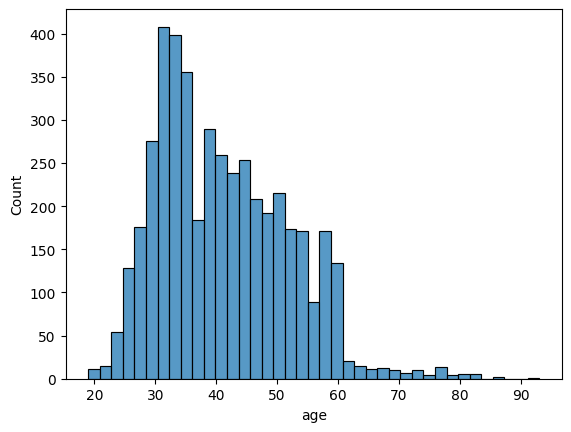

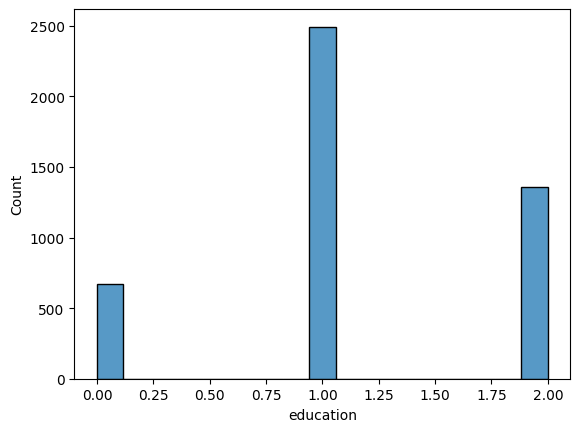

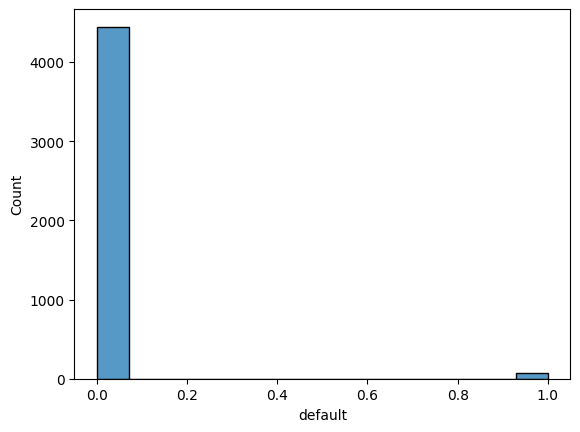

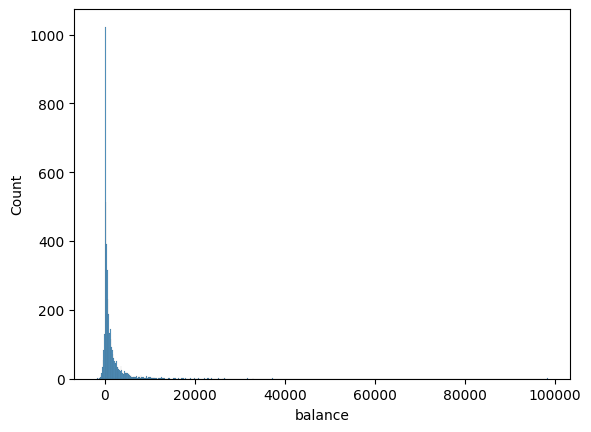

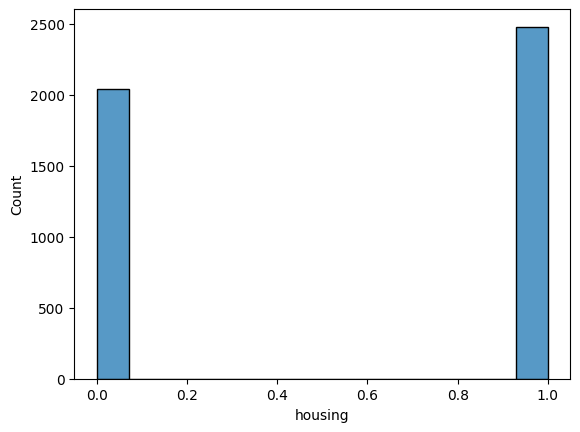

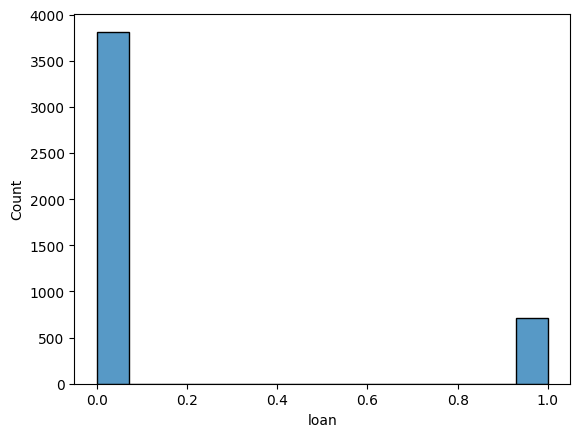

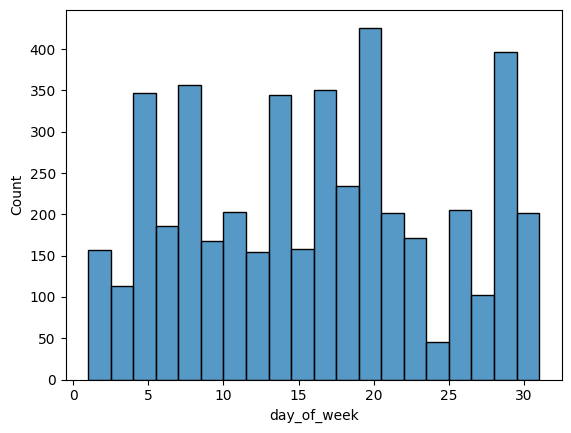

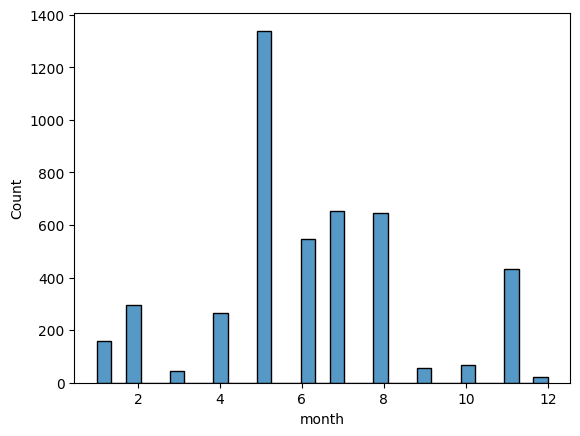

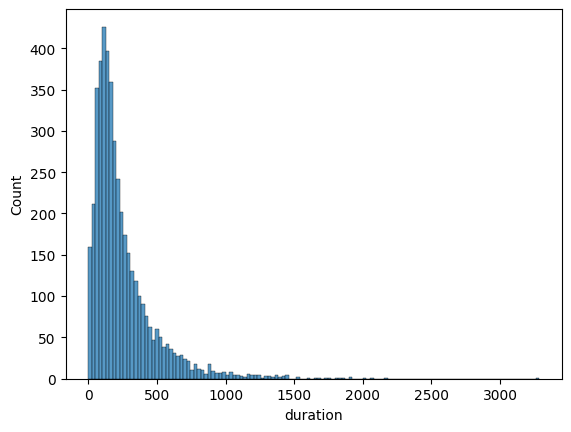

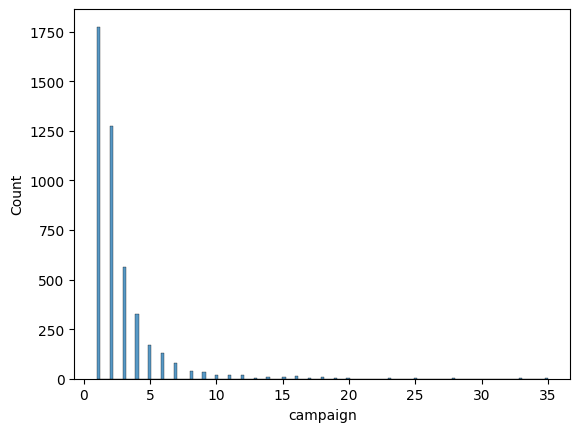

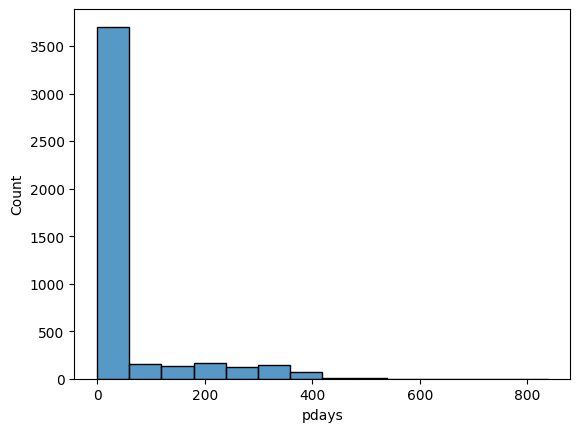

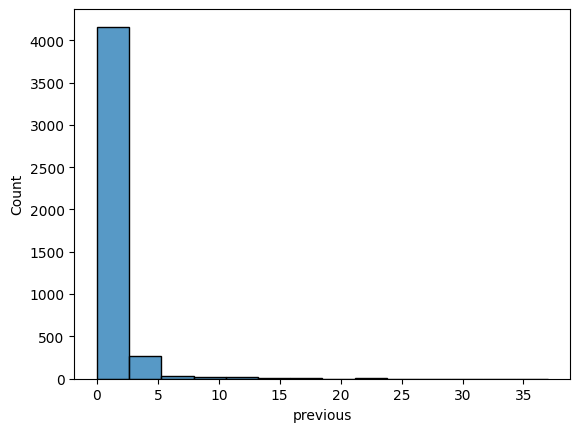

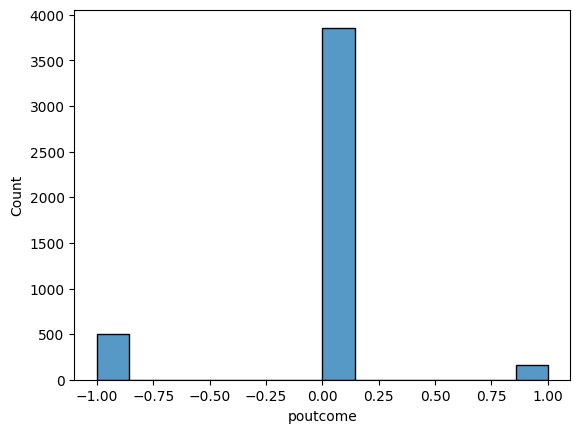

In [45]:
for column in X1_subset.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(data=X1_subset, x=column)
    plt.show()

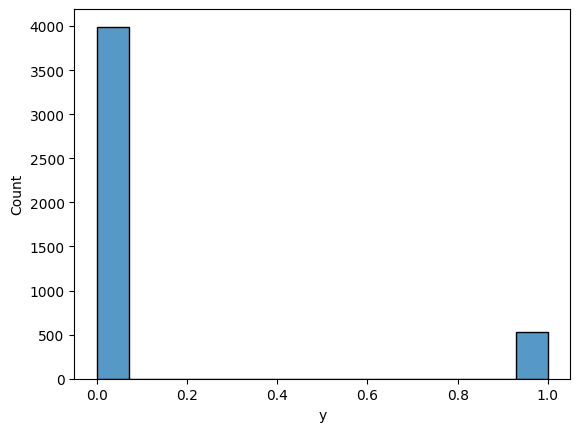

In [46]:

for column in y1_subset.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(data=y1_subset, x=column)
    plt.show()

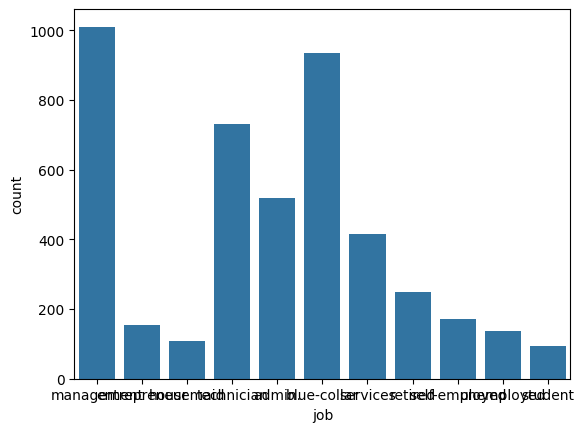

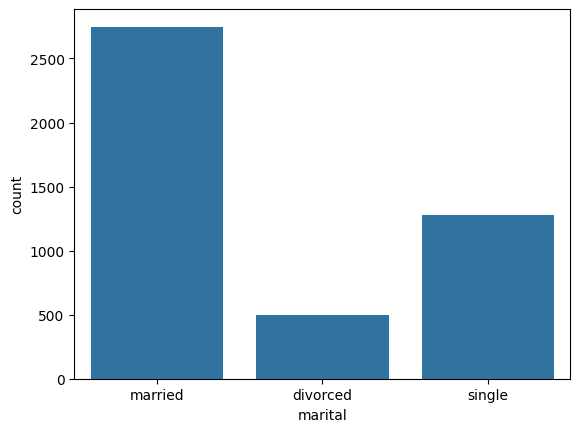

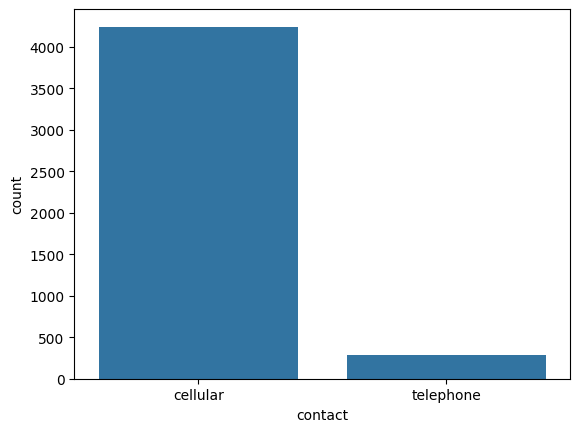

In [47]:
for column in X1_subset.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(data=X1_subset, x=column)
    plt.show()

In [48]:
def return_numerical(df):
    return df.select_dtypes(include=['int64', 'float64'])
X1_subset_numerical = return_numerical(X1_subset)

In [49]:
correlation_matrix = X1_subset_numerical.corr()

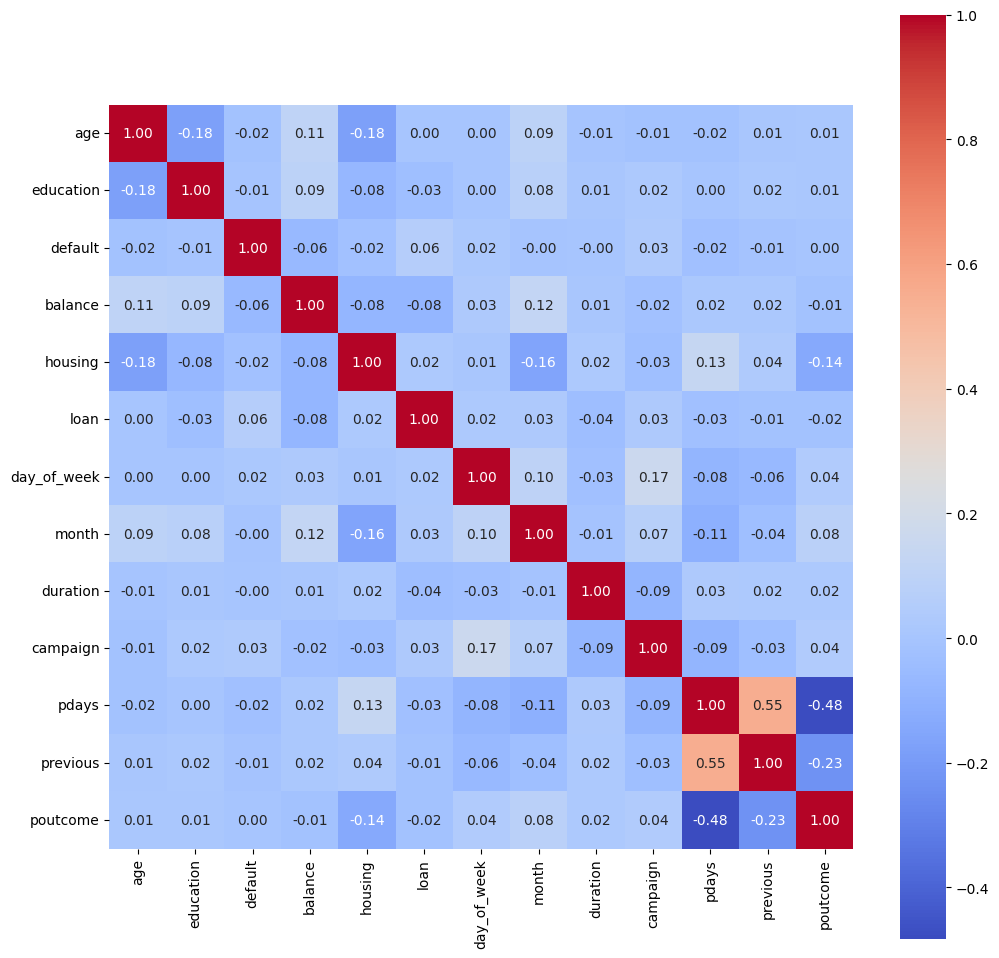

In [50]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

In [51]:
correlation_matrix=correlation_matrix.abs()

In [52]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
threshold = 0.5
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop highly correlated columns
X1_subset_reduced = X1_subset.drop(columns=to_drop)

print(f"Columns to drop: {to_drop}")
print(f"Reduced DataFrame shape: {X1_subset_reduced.shape}")

Columns to drop: ['previous']
Reduced DataFrame shape: (4522, 15)


In [53]:
# #To remove highly correlated variables in a dataset using Scikit-learn, you typically follow these steps:
#
# Calculate the correlation matrix.
# Identify pairs of highly correlated variables (e.g., with a correlation coefficient greater than a threshold).
# Remove one of each pair of highly correlated variables.
# Here is a step-by-step approach to achieve this using Scikit-learn along with Pandas:

In [54]:
X1_subset_reduced

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,poutcome
4008,55,management,married,2,0,0,0,0,cellular,16,5,409,3,-1,0
1191,41,entrepreneur,divorced,2,0,-413,1,0,cellular,8,5,170,2,-1,0
3432,58,management,divorced,2,0,347,0,0,cellular,15,5,525,1,-1,0
30891,27,management,single,2,0,317,0,0,cellular,9,2,59,3,-1,0
20337,32,housemaid,married,1,0,3832,0,0,cellular,11,8,80,3,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24770,34,blue-collar,married,1,0,2305,1,0,cellular,18,11,301,1,-1,0
37257,42,admin.,single,1,0,4253,1,0,cellular,13,5,146,1,-1,0
31715,37,technician,divorced,2,0,1174,1,0,cellular,7,4,436,1,140,-1
39473,33,services,married,2,0,570,0,0,cellular,25,5,70,1,-1,0


In [55]:
print("index of duplicated rows : ",list(X1_subset_reduced[X1_subset_reduced.duplicated()].index))
X1_subset_reduced = X1_subset_reduced.drop_duplicates()

index of duplicated rows :  []


In [56]:
X1_subset_reduced


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,poutcome
4008,55,management,married,2,0,0,0,0,cellular,16,5,409,3,-1,0
1191,41,entrepreneur,divorced,2,0,-413,1,0,cellular,8,5,170,2,-1,0
3432,58,management,divorced,2,0,347,0,0,cellular,15,5,525,1,-1,0
30891,27,management,single,2,0,317,0,0,cellular,9,2,59,3,-1,0
20337,32,housemaid,married,1,0,3832,0,0,cellular,11,8,80,3,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24770,34,blue-collar,married,1,0,2305,1,0,cellular,18,11,301,1,-1,0
37257,42,admin.,single,1,0,4253,1,0,cellular,13,5,146,1,-1,0
31715,37,technician,divorced,2,0,1174,1,0,cellular,7,4,436,1,140,-1
39473,33,services,married,2,0,570,0,0,cellular,25,5,70,1,-1,0


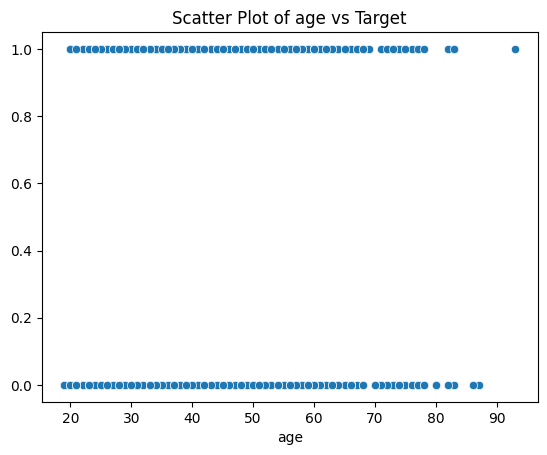

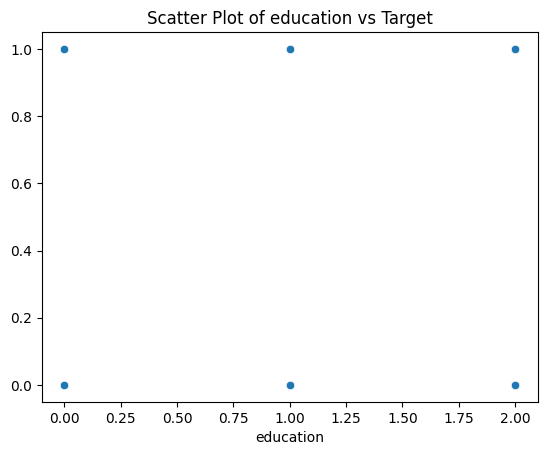

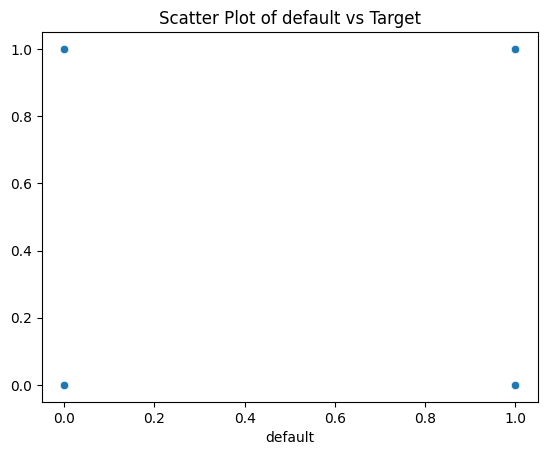

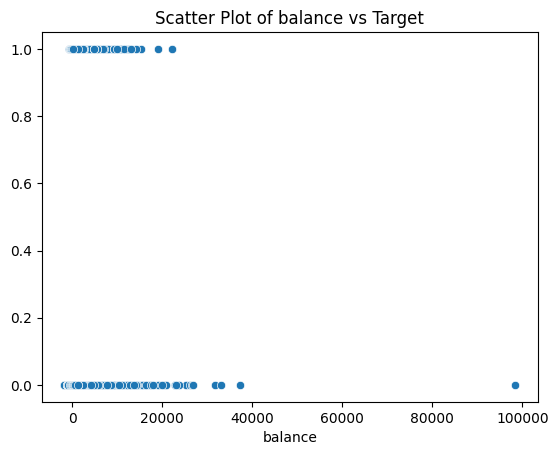

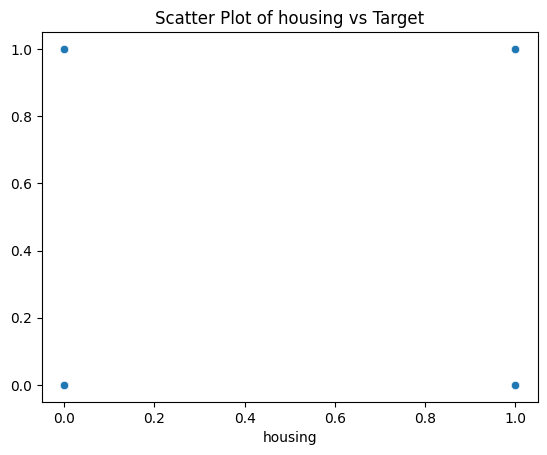

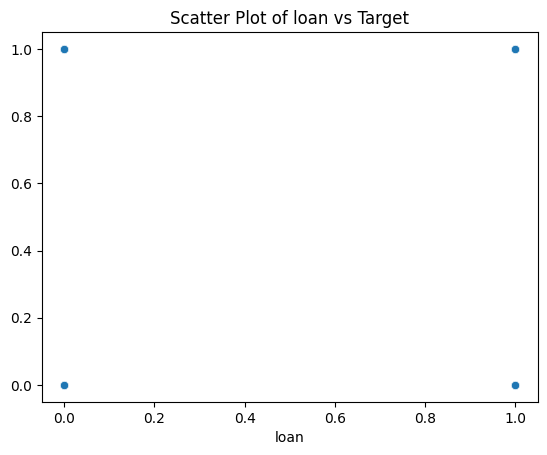

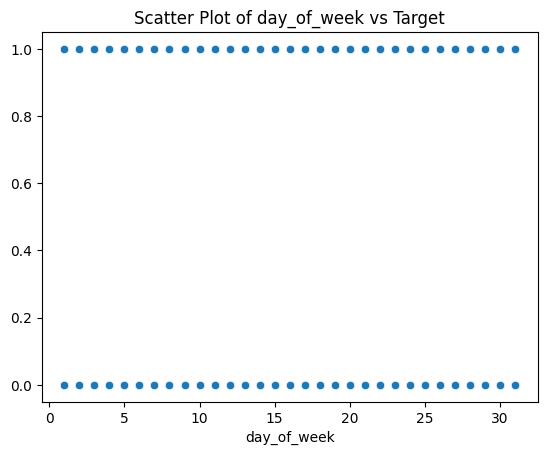

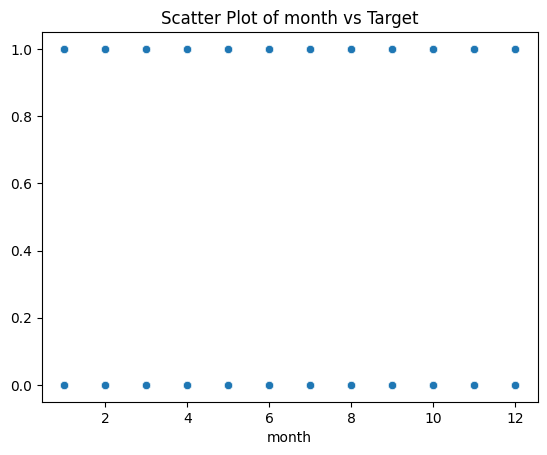

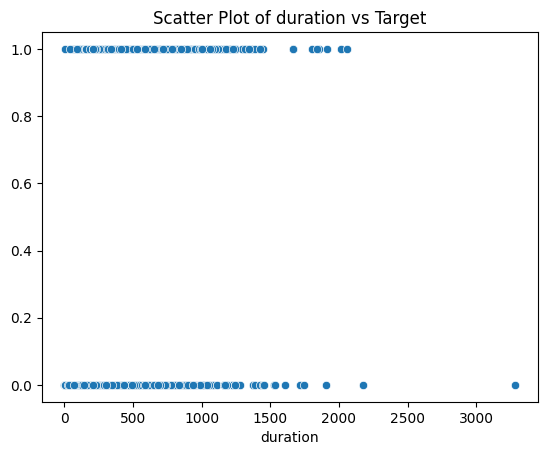

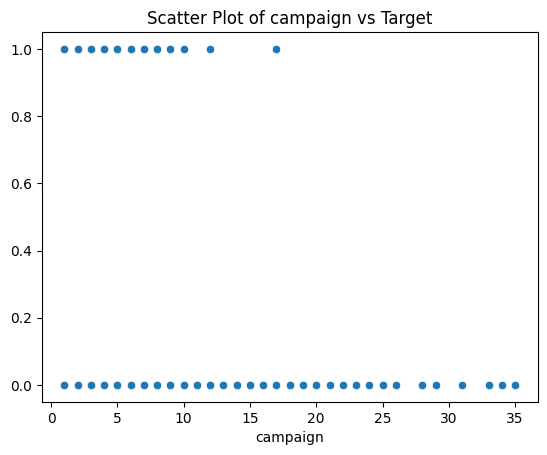

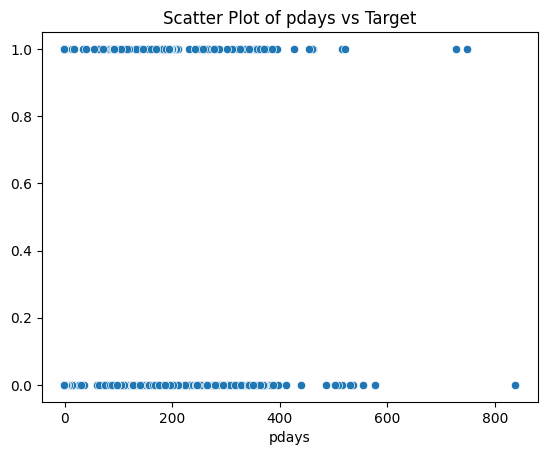

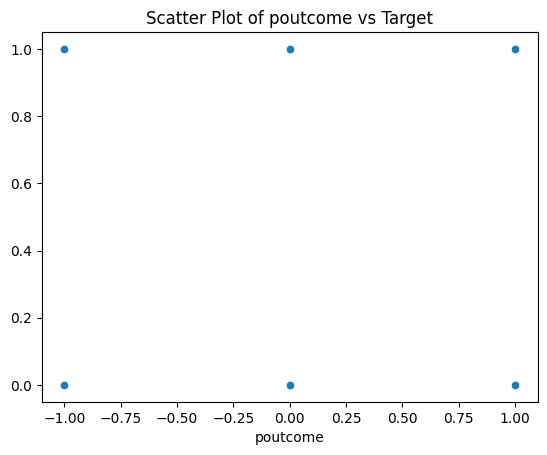

In [57]:
for column in X1_subset_reduced.select_dtypes(include=['float', 'int']).columns:
    sns.scatterplot(data=X1_subset, x=column, y=y1_subset.values.flatten())
    plt.title(f'Scatter Plot of {column} vs Target')
    plt.show()

In [58]:
X1_subset_reduced = X1_subset_reduced.drop(columns=['day_of_week', 'age','month'], axis=1)

In [59]:
y1_subset

,y
4008,0
1191,0
3432,0
30891,0
20337,0
...,...
24770,0
37257,0
31715,0
39473,0


In [60]:
from statsmodels.graphics.mosaicplot import mosaic

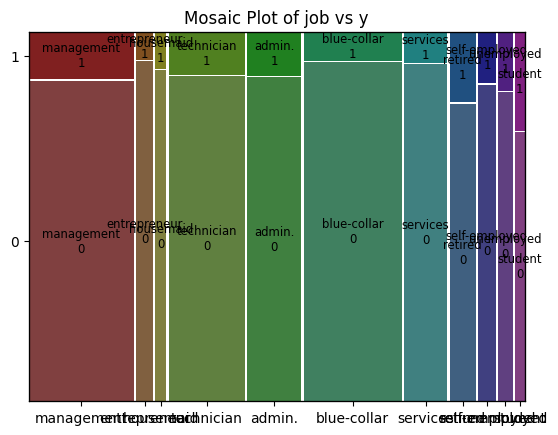

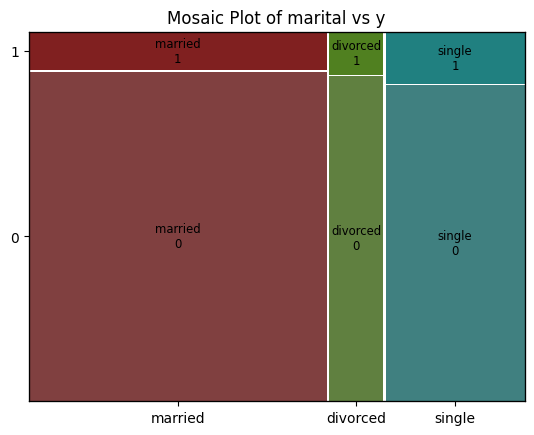

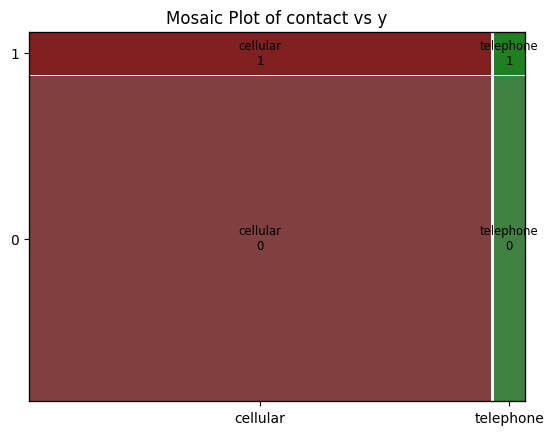

In [61]:
df = pd.concat([X1_subset, y1_subset], axis=1)

# Define the dependent variable name for convenience
dependent_variable = 'y'

# Plot mosaic plots
for column in X1_subset.select_dtypes(include=['object', 'category']).columns:
    mosaic(df, [column, dependent_variable])
    plt.title(f'Mosaic Plot of {column} vs {dependent_variable}')
    plt.show()



In [62]:
X1_subset_reduced = X1_subset_reduced.drop(columns=['contact'], axis=1)
def return_categorical(df):
    return df.select_dtypes(include=['object'])
categorical_columns = list(return_categorical(X1_subset_reduced).columns)
X1_subset_reduced = pd.get_dummies(X1_subset_reduced, columns=categorical_columns)



In [63]:
X1_subset_reduced

,education,default,balance,housing,loan,duration,campaign,pdays,poutcome,job_admin.,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
4008,2,0,0,0,0,409,3,-1,0,False,...,True,False,False,False,False,False,False,False,True,False
1191,2,0,-413,1,0,170,2,-1,0,False,...,False,False,False,False,False,False,False,True,False,False
3432,2,0,347,0,0,525,1,-1,0,False,...,True,False,False,False,False,False,False,True,False,False
30891,2,0,317,0,0,59,3,-1,0,False,...,True,False,False,False,False,False,False,False,False,True
20337,1,0,3832,0,0,80,3,-1,0,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24770,1,0,2305,1,0,301,1,-1,0,False,...,False,False,False,False,False,False,False,False,True,False
37257,1,0,4253,1,0,146,1,-1,0,True,...,False,False,False,False,False,False,False,False,False,True
31715,2,0,1174,1,0,436,1,140,-1,False,...,False,False,False,False,False,True,False,True,False,False
39473,2,0,570,0,0,70,1,-1,0,False,...,False,False,False,True,False,False,False,False,True,False


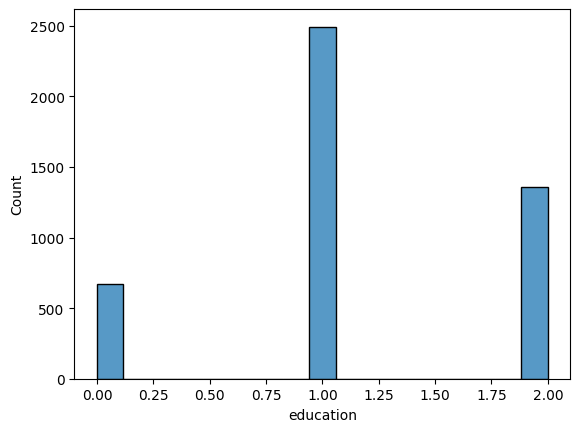

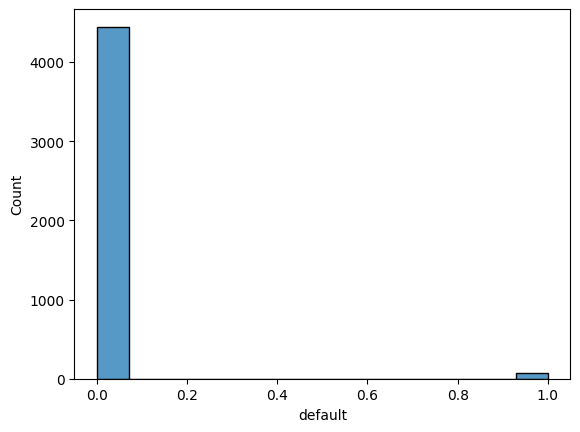

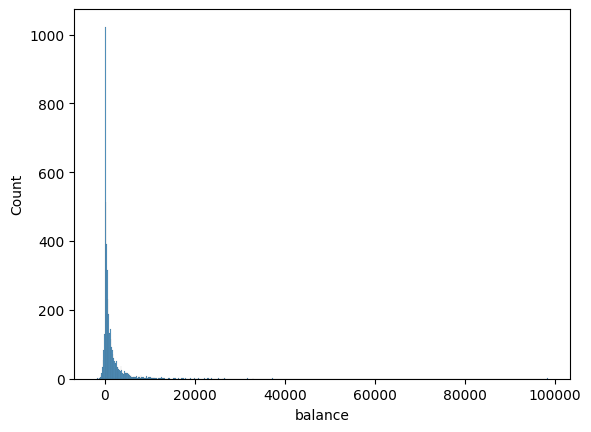

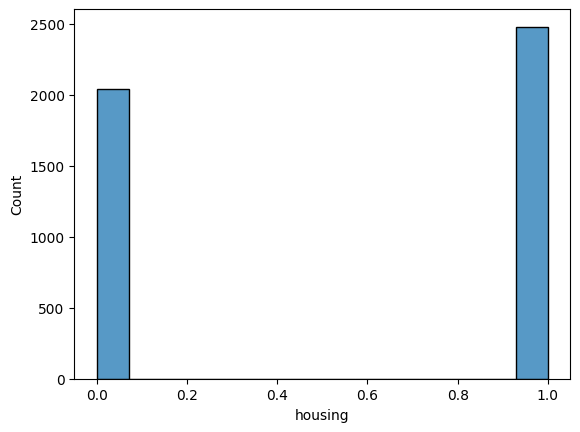

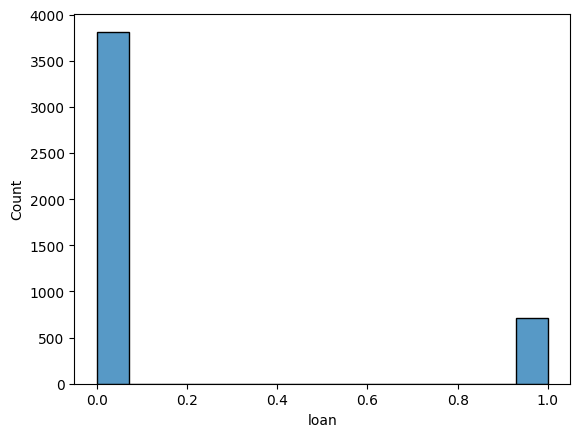

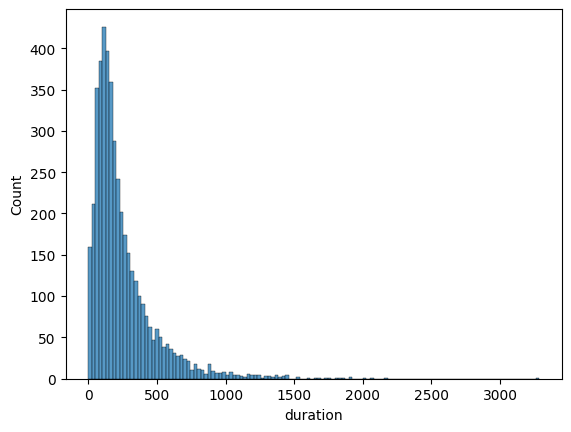

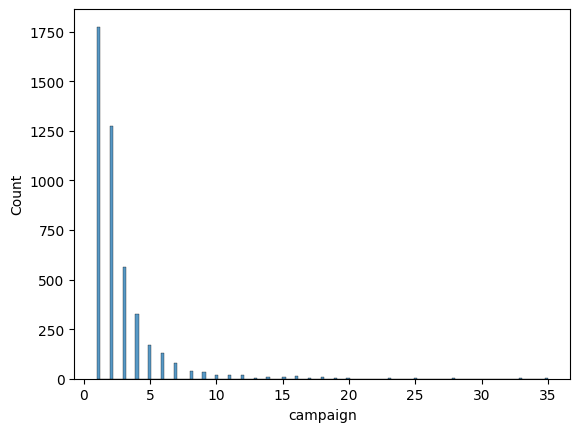

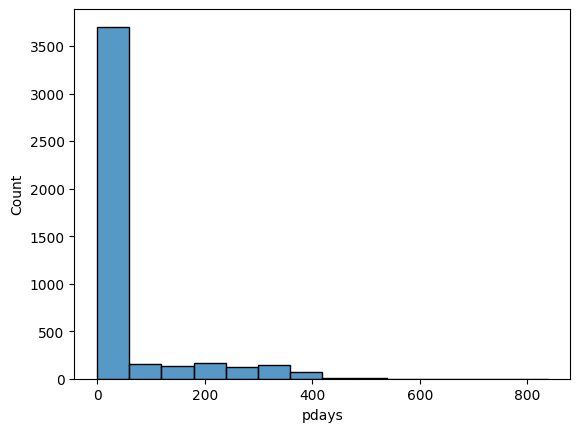

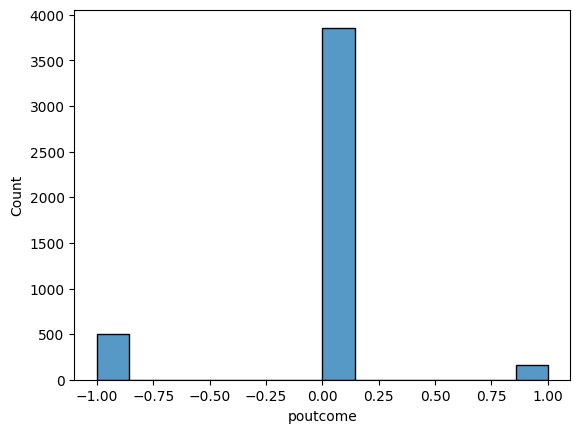

In [64]:
for column in X1_subset_reduced.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(data=X1_subset_reduced, x=column)
    plt.show()

In [65]:
X1_subset_reduced.to_csv('bankmarketing_X.csv', index=False)
X2.to_csv('breastcancer_X.csv', index=False)
y1_subset.to_csv('bankmarketing_Y.csv', index=False)
y2.to_csv('breastcancer_Y.csv', index=False)
